<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [1]:
import pandas as pd
import seaborn as sns
import re
import spacy
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary
from gensim import corpora
import pyLDAvis.gensim


In [2]:

yelp = pd.read_json('review_sample.json', lines=True)

In [3]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [4]:
#Define a tokenize function
nlp= spacy.load("en_core_web_lg")

def tokenize(doc):
    doc = nlp(doc)
    tokens = []
    for token in doc:
        if((token.is_stop == False) & (token.is_punct == False)) and (token.pos_!='PRON'):
            tokens.append(token.lemma_)
            
    return tokens
    

In [5]:
tokenize(yelp.text[0])


['beware',
 'fake',
 'fake',
 'fake',
 'small',
 'business',
 'Los',
 'Alamitos',
 'receive',
 'look',
 'like',
 'legitimate',
 'bill',
 '$',
 '70',
 'account',
 'number',
 ' ',
 'call',
 'phone',
 'number',
 'list',
 '866',
 '273',
 '7934',
 ' ',
 'wait',
 'time',
 'hold',
 'say',
 '20',
 'minute',
 'leave',
 'message',
 ' ',
 'live',
 'person',
 'phone',
 'matter',
 'number',
 'select',
 ' ',
 'leave',
 'firm',
 'message',
 'contact',
 'BBB',
 'attorney',
 'company',
 'try',
 'scam',
 'business',
 'illegal']

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [6]:
text = list(yelp.text)

#This creates a transformer 
vect = CountVectorizer()

vect.fit(text)

#Now this part can transform the text
dtm = vect.transform(text)

In [7]:
dtm = pd.DataFrame(dtm.todense(),columns=vect.get_feature_names())
dtm.head()


,00,000,001695,007,00a,00am,00ish,00pm,01,011802,...,誰も乗車しなくても,豆腐花,質問にも丁寧に答えてくれましたし,車好きさんには,這是一個不錯的選擇,運転しない,運転中も英語で指導があります,食べ物はうまい,餐後點了甜點,３時間後の便
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#write the fake review 
fake_review = ['the food was terrible was super undercooked the service was even worse, took them over 25 minutes just to get situated.']


In [9]:
nn  = NearestNeighbors(n_neighbors=15, algorithm='ball_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                 radius=1.0)

In [24]:
# Let's transform the 'fake_review'.

fake_review_transformed = vect.transform(fake_review)

In [25]:
# Query using kneighbors. 
result = nn.kneighbors(fake_review_transformed.todense())


In [60]:
for review_num in result[1][0]:
    print(yelp.text[review_num])

It was just ok.  I liked the setting and the food was decent but nothing too great.
This place just sucks. Food was terrible. Service was even worse some how. Just skip it all together.
This place was fantastic.  The food was amazing.  The service was superb.  Happy to have this gem in our neighborhood.
Very friendly service. Food was outstanding! The only problem was the lamb shank was tough. Loved everything else! Will return.
AMAZING!!! I had a maple cheese cake crepe that was soooo good. The food was delivered quickly and the service was impeccable.
great portion for the price! super good food and friendly service! only problem was the dirty cups...
Never going back.food came out  cold, grilled cheese was almost fried.service was slow even when the place was empty.
Rico, the bartender, was awful. He was rude, failed to offer drink refills, and was slow giving us the check.
First time going was last night. The chorizo taco I had was amazing. The bowl was amazing
The hostess was hot,

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [43]:
#Create Pipeline
vect = CountVectorizer()
clf = RandomForestClassifier()


#Now lets take a look at the parameters
parameters = {
    'vect__max_df': (0.9, 1.0),
    'clf__n_estimators': (15, 100),
    'clf__max_depth': (5, 10, 15, 20),
    'clf__random_state': (15, 35),
    'clf__verbose': (1, 10)
}

pipe = Pipeline([('vect', vect), ('clf', clf)])

In [44]:
# Let's instantiate the grid search and fit it.
grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(yelp.text, yelp.stars)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  6.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [45]:
best_pipe = grid_search.best_estimator_

In [46]:
best_pipe.predict(fake_review)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


array([5], dtype=int64)

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [47]:
yelp_tokenized=[]
for review in yelp.text:
    yelp_tokenized.append(tokenize(review))

In [57]:
yelp_tokenized[5]

['tasty',
 'fast',
 'casual',
 'latin',
 'street',
 'food',
 ' ',
 'menu',
 'overwhelming',
 'try',
 'good',
 ' ',
 'recommend',
 'try',
 'arepa',
 ' ',
 'nacho',
 'extremely',
 'good',
 'bang',
 'buck',
 'people',
 ' ',
 'space',
 'pretty',
 'small',
 'problematic',
 'Friday',
 'lunch',
 'Taco',
 'Tuesday']

Learn the vocubalary of the yelp data:

In [49]:
id2word = corpora.Dictionary(yelp_tokenized)


Create a bag of words representation of the entire corpus:

In [50]:
corpus = [id2word.doc2bow(review) for review in yelp_tokenized]


Your LDA model should be ready for estimation: 

In [51]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=10,
                   workers=4,
                   num_topics=5 # You can change this parameter
                  )

Create 1-2 visualizations of the results

In [52]:
def print_lda_topics(lda):
    words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
    topics = [' '.join(t[5:10]) for t in words]
    for id, t in enumerate(topics): 
        print(f"------ Topic {id} ------")
        print(t, end="\n\n")
print_lda_topics(lda)

------ Topic 0 ------
come order like place great

------ Topic 1 ------
service come time like love

------ Topic 2 ------
service great order like time

------ Topic 3 ------
time food great service go

------ Topic 4 ------
time like come order food



In [53]:
pyLDAvis.enable_notebook()


In [54]:
vis_data = pyLDAvis.gensim.prepare(lda, corpus, id2word)


In [55]:
pyLDAvis.display(vis_data)


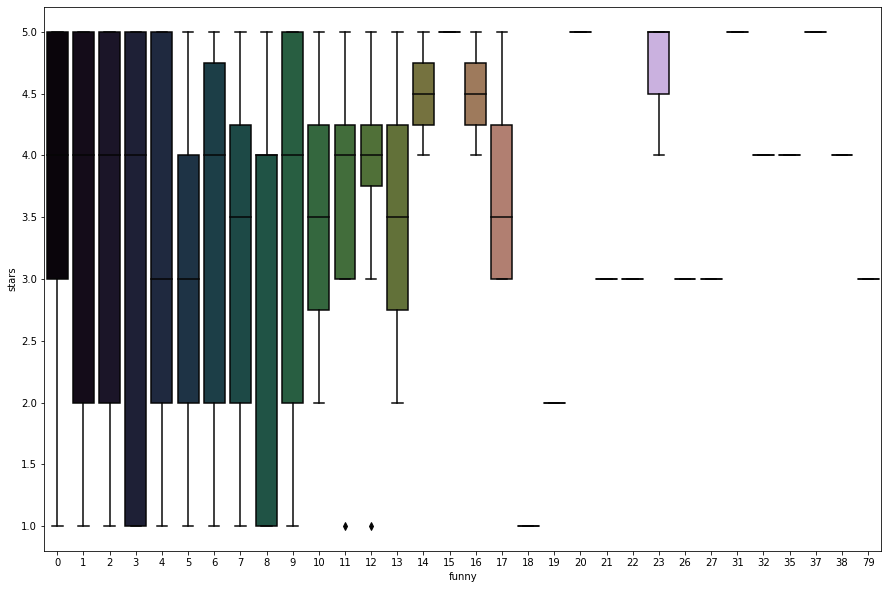

In [56]:
ax = plt.figure(figsize=(15,10))
sns.boxplot(x='funny', y='stars',
                 data=yelp, palette='cubehelix');

My analysis of the topic model's results were that it was close to what I was expecting from the Yelp reviews. My results for the Gensim visualization seems to be giving me the same results for similar words such as: come, order, like, great, good, place, food, service which makes sense since the majority of the reviews use those words. Gensim is a cool library for NLP that I'll be using more often for these kind of projects.

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Create more visualizations of the LDA results and provide written analysis
* Incorporate RandomizedSearchCV into docoument classification pipeline
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)